### Introduction

The New York City Taxi & Limousine Commission has been releasing very detailed data of taxi trips in the New York city since January 2009. The dataset is humongous with details of taxi trips consisting of more than billion records of the trips. The trip data not only consist of time of pick up and drop off, fare, locations along with other details, but it also tells about the tipping behavior of customers.
 	In this project we are using the yellow taxi data set for the month of June 2019. The data set and dictionary along with meta data are available at  https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page (Links to an external site.) and the dictionary of features in the data set is available at https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf (Links to an external site.) .  The dataset consists of over 6.9  million rows and 19 columns.
    
In the first part of the project, we planned to evaluate if the customer will pay the tip at all. In thisstep we planned to use classification techniques and determine best models based on Accuracy score. In the second part of the project, we wanted to predict tip percentage and find the contribution of different variables available in the dataset. During this part of the project we intended to use regression techniques and evaluate the models based on Mean Square Error (MSE) and co-efficient of determination (R-squared) values</font>




### Obtain the Data
Loading the dataset and necessary packages-Initially, we imported the necessary packages and downloaded the New York Yellow Taxi data for June 2019 in the Jupyter Notebook and looked at the number of rows and columns.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
! pip install pyarrow
import pyarrow.parquet as pq
data = pq.read_table('yellow_tripdata_2019-06.parquet')
data = data.to_pandas()



In [3]:
yt=data

#### Explore The Data

In [4]:
print(yt.head())
print(yt.tail())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-06-01 00:55:13   2019-06-01 00:56:17              1.0   
1         1  2019-06-01 00:06:31   2019-06-01 00:06:52              1.0   
2         1  2019-06-01 00:17:05   2019-06-01 00:36:38              1.0   
3         1  2019-06-01 00:59:02   2019-06-01 00:59:12              0.0   
4         1  2019-06-01 00:03:25   2019-06-01 00:15:42              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.0         1.0                  N           145           145   
1            0.0         1.0                  N           262           263   
2            4.4         1.0                  N            74             7   
3            0.8         1.0                  N           145           145   
4            1.7         1.0                  N           113           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [5]:
print("Number of rows:",yt.shape[0])
print ("Number of columns: ", yt.shape[1])

Number of rows: 6971560
Number of columns:  19


In [6]:
yt.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.971560e+06,6.940813e+06,6.971560e+06,6.940813e+06,6.971560e+06,6.971560e+06,6.971560e+06,6.971560e+06,6.971560e+06,6.971560e+06,6.971560e+06,6.971560e+06,6.971560e+06,6.971560e+06,6.940813e+06
mean,1.644114e+00,1.567302e+00,3.110416e+00,1.059410e+00,1.621921e+02,1.606894e+02,1.286354e+00,1.376760e+01,1.169530e+00,4.941965e-01,2.256254e+00,4.141655e-01,2.984893e-01,1.984076e+01,2.274490e+00
std,5.013376e-01,1.210847e+00,1.787155e+01,7.359563e-01,6.644005e+01,7.051460e+01,4.875270e-01,1.320530e+02,1.278424e+00,1.026332e-01,2.960179e+00,1.810317e+00,2.851764e-02,1.324026e+02,7.289201e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-3.240000e+02,-2.650000e+01,-5.000000e-01,-8.888000e+01,-3.974000e+01,-3.000000e-01,-3.302000e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.690000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.480000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,3.190000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.550000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.135000e+01,2.500000e+00
max,5.000000e+00,9.000000e+00,4.597722e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.469500e+05,8.476000e+01,2.124200e+02,1.624640e+03,8.230000e+02,3.000000e-01,3.470350e+05,2.750000e+00


In [7]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6971560 entries, 0 to 6971559
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

***Converting pick up time and drop off time to datetime objects***

In [9]:
yt['tpep_pickup_datetime'] = pd.to_datetime((yt.tpep_pickup_datetime))

In [10]:
yt['tpep_dropoff_datetime'] = pd.to_datetime((yt.tpep_dropoff_datetime))


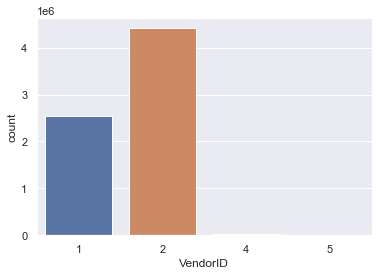

In [11]:
 sns.countplot(x="VendorID", data=yt)
 plt.show()

#### Exploring different features of the data set:

****1.Passenger count by Vendor ID-1****

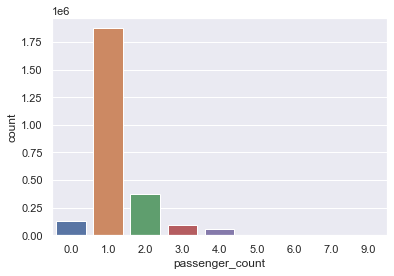

In [12]:
sns.countplot(x="passenger_count", data=yt[yt["VendorID"] == 1])
plt.show()

****2.Passenger count by Vendor ID 2****

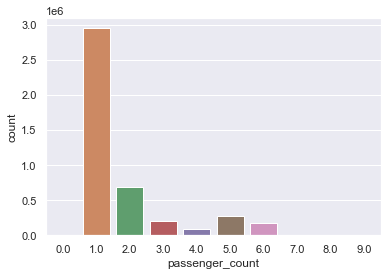

In [13]:
sns.countplot(x="passenger_count", data=yt[yt["VendorID"] == 2])
plt.show()


***Most of the rides had only 1 passenger***

#### Analysing trip distance 

1. With outliers 

trip distance without outliers


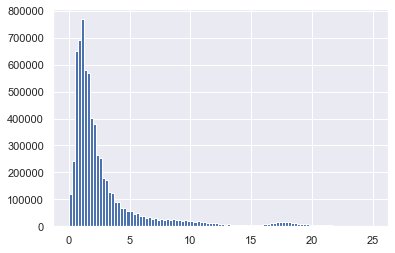

In [14]:
print("trip distance without outliers")
yt.trip_distance.hist(bins=100,range=[0,25])
plt.show()

2. Without outliers

trip distance with outliers


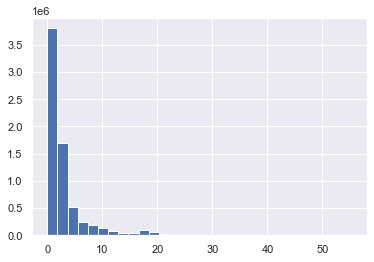

In [15]:
print("trip distance with outliers")
v = yt.trip_distance 
v[~((v-v.median()).abs()>3*v.std())].hist(bins=30) 
plt.show()


#### Converting time into hours of the day

In [16]:

yt['Pickup_d'] = yt.tpep_pickup_datetime
yt['Dropoff_d'] = yt.tpep_dropoff_datetime
# Second, create a variable for pickup hours
yt['Pickup_h'] = yt.Pickup_d.apply(lambda x:x.hour)

****Making pointplot of trip distance with respect to pick up hours****

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


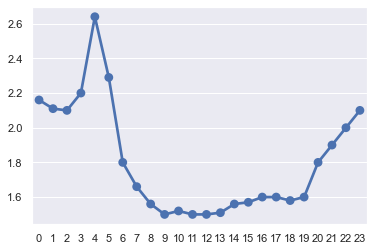

In [17]:
yt_agg = yt.groupby('Pickup_h')['trip_distance'].aggregate(np.median).reset_index()
sns.pointplot(yt_agg.Pickup_h.values, yt_agg.trip_distance.values)
plt.show()

***The longer distances are traveled in evening hours and night time, where as regular working hours (09:00 AM to 06:00 AM) the travel distances are smaller.***

###  Checking the tip percentage for fares greater than 4.0 as those fares are unlikely 

In [18]:

yt = yt[(yt.total_amount>=4.0)]
yt['tip_percentage'] = 100*yt.tip_amount/yt.total_amount
print ("tip percentage\n",yt.tip_percentage.describe())

C:\Users\SRISHT~1\AppData\Local\Temp/ipykernel_20412/1841148194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt['tip_percentage'] = 100*yt.tip_amount/yt.total_amount


tip percentage
 count    6.939561e+06
mean     1.069838e+01
std      8.058082e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.449275e+01
75%      1.666667e+01
max      9.986974e+01
Name: tip_percentage, dtype: float64


****Replacing missing values  in trip_type with the most frequent value 1 and removing all  negative values from total amound and fare_amount****

In [19]:
#### https://github.com/kthouz/NYC_Green_Taxi (Most of the python codes are taken from here)
#### https://www.kaggle.com/kartikkannapur/nyc-taxi-trips-exploratory-data-analysis( A few python codes are taken from here)
print ("Replacing Negative values with absolute values")
print ("total_amount", 100*yt[yt.total_amount<0].shape[0]/float(yt.shape[0]),"%")
print("fare_amount", 100*yt[yt.fare_amount<0].shape[0]/float(yt.shape[0]),"%")
print ("improvement_surcharge", 100*yt[yt.improvement_surcharge<0].shape[0]/float(yt.shape[0]),"%")
print("tip_amount", 100*yt[yt.tip_amount<0].shape[0]/float(yt.shape[0]),"%")
print("tolls_amount", 100*yt[yt.tolls_amount<0].shape[0]/float(yt.shape[0]),"%")
print ("mta_tax", 100*yt[yt.mta_tax<0].shape[0]/float(yt.shape[0]),"%")
yt.total_amount = yt.total_amount.abs()
yt.fare_amount = yt.fare_amount.abs()
yt.improvement_surcharge = yt.improvement_surcharge.abs()
yt.tip_amount = yt.tip_amount.abs()
yt.tolls_amount = yt.tolls_amount.abs()
yt.mta_tax = yt.mta_tax.abs()

Replacing Negative values with absolute values
total_amount 0.0 %
fare_amount 2.8820266872789216e-05 %
improvement_surcharge 0.0 %
tip_amount 0.0 %
tolls_amount 0.0 %
mta_tax 0.0 %


D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Slicing  pick up and drop off time to Weekday, Month Day, Month, Hours 

In [20]:
#### https://github.com/kthouz/NYC_Green_Taxi (Most of the python codes are taken from here)
yt['Week_day']  = yt.Pickup_d.apply(lambda x:x.isocalendar()[2])


C:\Users\SRISHT~1\AppData\Local\Temp/ipykernel_20412/638294578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt['Week_day']  = yt.Pickup_d.apply(lambda x:x.isocalendar()[2])


In [21]:
#### https://github.com/kthouz/NYC_Green_Taxi (Most of the python codes are taken from here
#### https://www.kaggle.com/kartikkannapur/nyc-taxi-trips-exploratory-data-analysis( A few python codes are taken from here)
#  time variables Week,Weekday,Month Day,Month,Hour
print ("deriving time variables...")
#ref_week = dt.datetime(2019,1,1).isocalendar()[1] 
#yt['Week'] = yt.Pickup_d.apply(lambda x:x.isocalendar()[3])#-ref_week+1
#yt['Week_day']  = yt.Pickup_d.apply(lambda x:x.isoweekday)
yt['Month_day'] = yt.Pickup_d.apply(lambda x:x.day)
yt['Month'] = yt.Pickup_d.apply(lambda x:x.month)
yt['Hour'] = yt.Pickup_d.apply(lambda x:x.hour)

# create shift variable:  1=(7am to 3pm), 2=(3pm to 11pm) and 3=(11pm to 7am)
yt['Shift_type'] = np.NAN
yt.loc[yt[(yt.Hour>=7) & (yt.Hour<15)].index,'Shift_type'] = 1
yt.loc[yt[(yt.Hour>=15) & (yt.Hour<23)].index,'Shift_type'] = 2
yt.loc[yt[yt.Shift_type.isnull()].index,'Shift_type'] = 3
print ("derived time variables...")
    
# Trip duration 
print ("deriving Trip_duration...")
yt['Trip_duration'] = ((yt.Dropoff_d-yt.Pickup_d).apply(lambda x:x.total_seconds()/60.))
print ("derived Trip Duration...")
    

deriving time variables...


C:\Users\SRISHT~1\AppData\Local\Temp/ipykernel_20412/3257606698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt['Month_day'] = yt.Pickup_d.apply(lambda x:x.day)
C:\Users\SRISHT~1\AppData\Local\Temp/ipykernel_20412/3257606698.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt['Month'] = yt.Pickup_d.apply(lambda x:x.month)
C:\Users\SRISHT~1\AppData\Local\Temp/ipykernel_20412/3257606698.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

derived time variables...
deriving Trip_duration...
derived Trip Duration...


C:\Users\SRISHT~1\AppData\Local\Temp/ipykernel_20412/3257606698.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt['Trip_duration'] = ((yt.Dropoff_d-yt.Pickup_d).apply(lambda x:x.total_seconds()/60.))


****Cross-checking  the dataset after making transformations****

In [22]:
yt.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Pickup_d,Dropoff_d,Pickup_h,tip_percentage,Week_day,Month_day,Month,Hour,Shift_type,Trip_duration
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1.0,0.0,1.0,N,145,145,2,...,2019-06-01 00:55:13,2019-06-01 00:56:17,0,0.00000,6,1,6,0,3.0,1.066667
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1.0,0.0,1.0,N,262,263,2,...,2019-06-01 00:06:31,2019-06-01 00:06:52,0,0.00000,6,1,6,0,3.0,0.350000
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1.0,4.4,1.0,N,74,7,2,...,2019-06-01 00:17:05,2019-06-01 00:36:38,0,0.00000,6,1,6,0,3.0,19.550000
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0.0,0.8,1.0,N,145,145,2,...,2019-06-01 00:59:02,2019-06-01 00:59:12,0,0.00000,6,1,6,0,3.0,0.166667
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.7,1.0,N,113,148,1,...,2019-06-01 00:03:25,2019-06-01 00:15:42,0,16.61442,6,1,6,0,3.0,12.283333


####  Checking the impact of weekday on median trip distance
***Converting negative distances to positive***


In [24]:
yt.Trip_duration = yt.Trip_duration.abs()

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


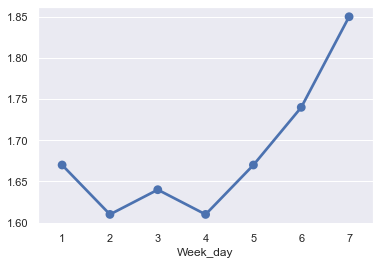

In [25]:
#### https://www.kaggle.com/kartikkannapur/nyc-taxi-trips-exploratory-data-analysis
yt_agg = yt.groupby('Week_day')['trip_distance'].aggregate(np.median).reset_index()
sns.pointplot(yt_agg.Week_day, yt_agg.trip_distance.values)
plt.show()


***In ISO Calender Monday is the first day of the week. Trip distances are higher during the weekends***

#### Checking the impact of weekday on total trips 

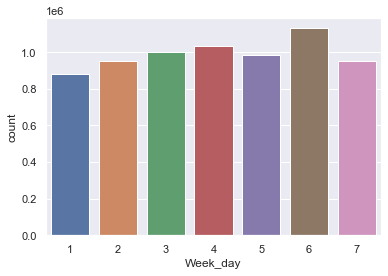

In [28]:
sns.countplot(x="Week_day", data=yt)
plt.show()

***Number of trips are slightly higher for Saturday***

###  Checking the impact of hours (24 hours day) of day on number of trips 

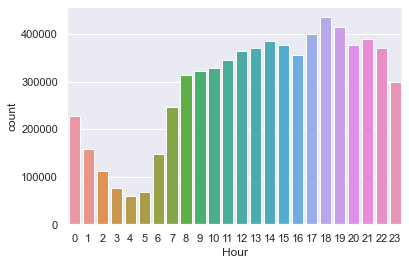

In [30]:

sns.countplot(x="Hour",data= yt)
plt.show()


***As expected night hours have lower trips. Yellow taxi trips peaks around 06:00 pm***

####  Checking the impact of weekday on trip duration

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


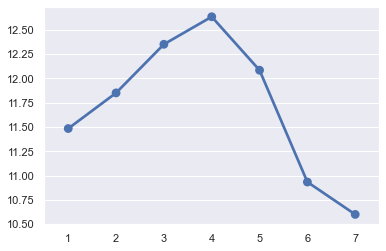

In [31]:
yt_agg = yt.groupby('Week_day')['Trip_duration'].aggregate(np.median).reset_index()
sns.pointplot(yt_agg.Week_day.values, yt_agg.Trip_duration.values)
plt.show()

***Median trip duration in minutes is lowest during the weekend most likely due to less traffic congestion inside New York City***

#### Checking  the impact of hour of day on trip duration

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


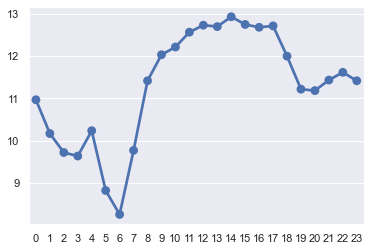

In [32]:
yt_agg = yt.groupby('Hour')['Trip_duration'].aggregate(np.median).reset_index()
sns.pointplot(yt_agg.Hour.values, yt_agg.Trip_duration.values)
plt.show()

***Trip Duration expectedly is longer during the day between 08:00 am and 06:00 pm***

## Feature Engineering and preprocessing the data

***Checking missing values***

In [33]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())
#Applying per column:
#print "Missing values per column:"
yt.apply(num_missing, axis=0) 

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            30722
trip_distance                  0
RatecodeID                 30722
store_and_fwd_flag         30722
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       30722
airport_fee              6939561
Pickup_d                       0
Dropoff_d                      0
Pickup_h                       0
tip_percentage                 0
Week_day                       0
Month_day                      0
Month                          0
Hour                           0
Shift_type                     0
Trip_duration                  0
dtype: int64

### We see several missing values in features,  RatecodeID,congestion surcharge and airport fee. This features are not important in out analysis and we will drop them during modeling. rWe still have to decide about the  passenger count and if needed we can just drop those rows.

***Creating a new column 'with tip ' when tip is paid***

In [34]:
#### https://github.com/kthouz/NYC_Green_Taxi (Most of the python codes are taken from here)
# create column to show if trip is payed
yt['with_tip'] = (yt.tip_percentage>0)*1

C:\Users\SRISHT~1\AppData\Local\Temp/ipykernel_20412/649246895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt['with_tip'] = (yt.tip_percentage>0)*1


***payment type when tips are paid***

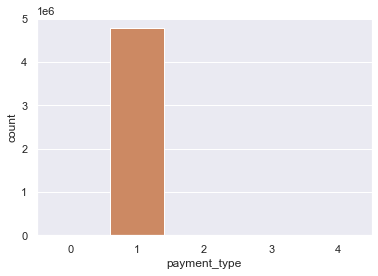

In [36]:

sns.countplot(x="payment_type", data=yt[yt["with_tip"] == 1])
plt.show()

***payment type when tips are not paid***

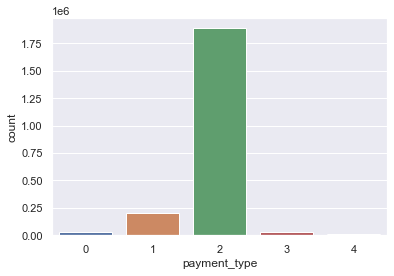

In [37]:
sns.countplot(x="payment_type", data=yt[yt["with_tip"] == 0])
plt.show()

### Histogram of tips 

***Based on rate code id***


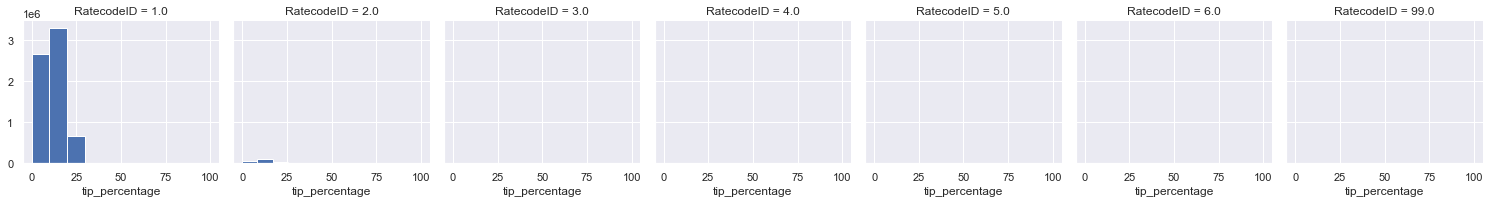

In [38]:
g = sns.FacetGrid(yt, col="RatecodeID")
g.map(plt.hist, "tip_percentage")
plt.show()

***Rate Code ID 1 is credit card payments and it seems unless credit card is used tips are not recordedly***

#### Tip % Histogram

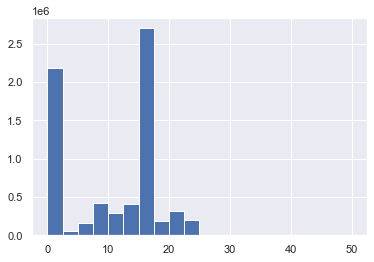

In [39]:
yt.tip_percentage.hist(bins =20 ,range=[0,50])
plt.show()

***Dominant cases are when no tip is paid and  when it is paid it is between 15-17.5 %***

####  Checking the impact of pick up time on tipping behaviour

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


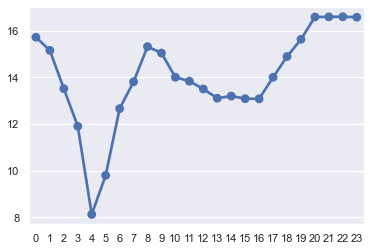

In [41]:
yt_t = yt.groupby('Pickup_h')['tip_percentage'].aggregate(np.median).reset_index()
sns.pointplot(yt_t.Pickup_h.values, yt_t.tip_percentage.values)
plt.show()


***Median tip % is lowest around 8% at around 04:00 am and is highest between 08:00 PM to Midnight***

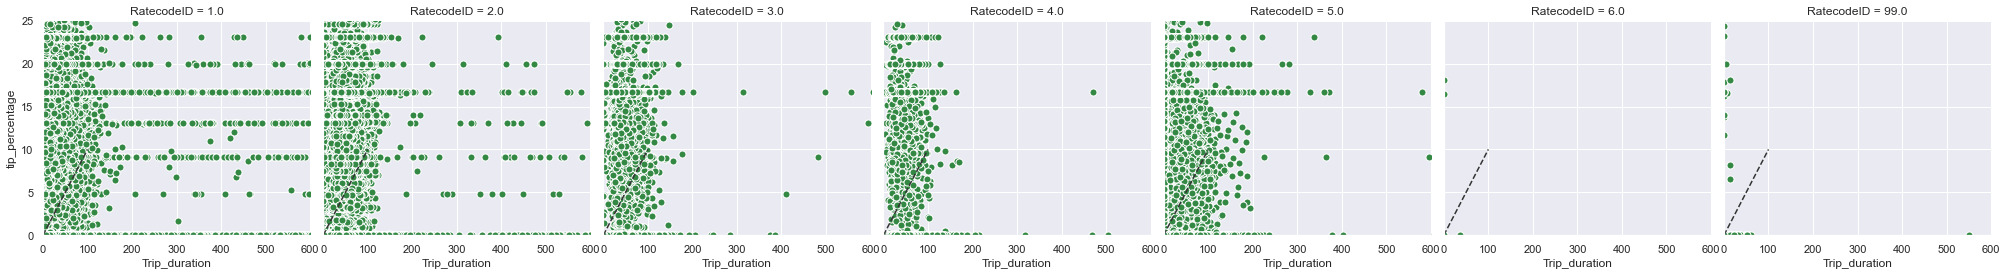

In [42]:
g = sns.FacetGrid(yt, col="RatecodeID", margin_titles=True, height=4)
g.map(plt.scatter, "Trip_duration", "tip_percentage", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 100), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 600), ylim=(0, 25));

### Checking the impact of Month Day on tip percentage

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


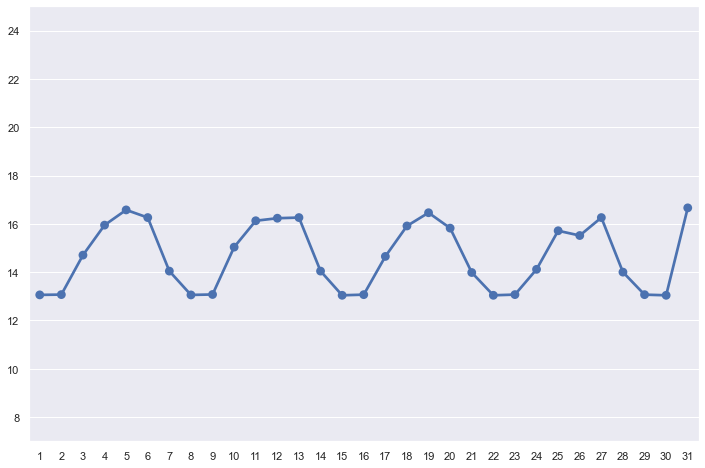

In [43]:
yt_agg4 = yt.groupby('Month_day')['tip_percentage'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
lm3=sns.pointplot(yt_agg4.Month_day.values, yt_agg4.tip_percentage.values)
axes = lm3.axes
axes.set_ylim(7,25)
plt.show()

***Month of June 2019 started on Saturday, and interestingly the tips during the weekends are the lowest***

###  Verifying the findings using the iso weekday calender

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


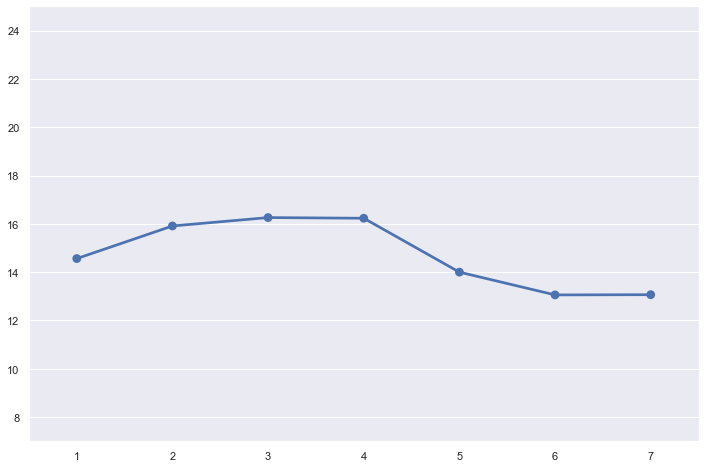

In [45]:
yt_agg2 = yt.groupby('Week_day')['tip_percentage'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
lm4=sns.pointplot(yt_agg2.Week_day.values, yt_agg2.tip_percentage.values)
axes = lm4.axes
axes.set_ylim(7,25)
plt.show()



***The  pattern indicates that weekend tip% is indeed lower and highest  tip is paid during Tuesday, Wednesday and Thursday***

### Making a new copy of yt

In [46]:
yti=yt

In [47]:
yti.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Dropoff_d,Pickup_h,tip_percentage,Week_day,Month_day,Month,Hour,Shift_type,Trip_duration,with_tip
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1.0,0.0,1.0,N,145,145,2,...,2019-06-01 00:56:17,0,0.00000,6,1,6,0,3.0,1.066667,0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1.0,0.0,1.0,N,262,263,2,...,2019-06-01 00:06:52,0,0.00000,6,1,6,0,3.0,0.350000,0
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1.0,4.4,1.0,N,74,7,2,...,2019-06-01 00:36:38,0,0.00000,6,1,6,0,3.0,19.550000,0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0.0,0.8,1.0,N,145,145,2,...,2019-06-01 00:59:12,0,0.00000,6,1,6,0,3.0,0.166667,0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.7,1.0,N,113,148,1,...,2019-06-01 00:15:42,0,16.61442,6,1,6,0,3.0,12.283333,1


### Creating a new variable Credit Card, when payment is done by credit card

In [48]:
yti['credit_card'] = np.where(yti['payment_type']==1,1,0)

C:\Users\SRISHT~1\AppData\Local\Temp/ipykernel_20412/1396783181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yti['credit_card'] = np.where(yti['payment_type']==1,1,0)


In [49]:
pd.value_counts(yti.credit_card)

1    4981574
0    1957987
Name: credit_card, dtype: int64

In [50]:
pd.value_counts(yti.payment_type)

1    4981574
2    1889230
0      30722
3      28784
4       9251
Name: payment_type, dtype: int64

In [67]:
#yti=pd.get_dummies(yti, columns=['Hour', 'Shift_type', 'RatecodeID', 'Week_day','payment_type'], drop_first=True)

### Making a list of continuious variables and generating heat map to check correlation between continuious features

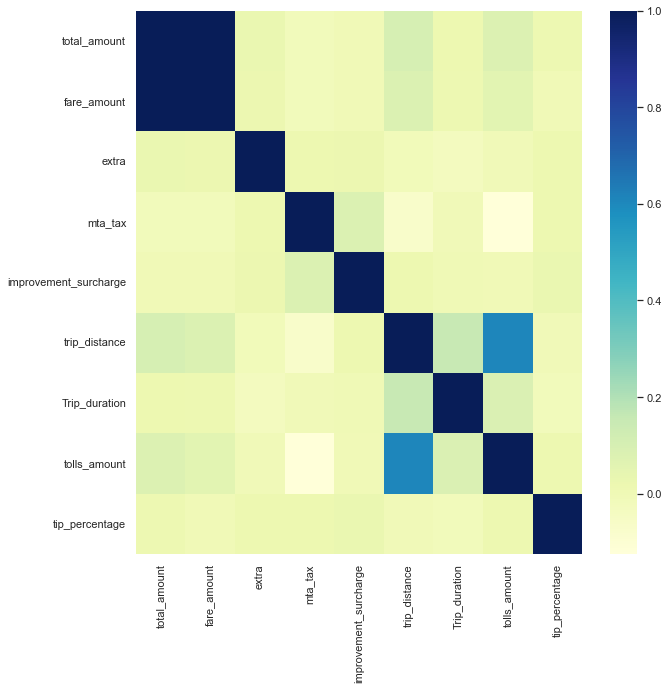

In [51]:
continuous_variables=['total_amount','fare_amount','extra','mta_tax','improvement_surcharge','trip_distance','Trip_duration','tolls_amount','tip_percentage']
cor_mat = yti[continuous_variables]
# calculate the correlation matrix
corr = cor_mat.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(corr,cmap="YlGnBu",
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()


### To show the values in the correlation matrix

In [52]:
#### https://www.kaggle.com/kartikkannapur/nyc-taxi-trips-exploratory-data-analysis
#corelation coefficient values between continuious variables
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

C:\Users\SRISHT~1\AppData\Local\Temp/ipykernel_20412/2150898683.py:17: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\


,total_amount,fare_amount,extra,mta_tax,improvement_surcharge,trip_distance,Trip_duration,tolls_amount,tip_percentage
total_amount,1.00,1.00,0.02,-0.02,-0.00,0.10,0.02,0.08,0.01
fare_amount,1.00,1.00,0.02,-0.02,-0.01,0.08,0.01,0.06,-0.00
extra,0.02,0.02,1.00,0.02,0.02,-0.01,-0.03,-0.01,0.02
mta_tax,-0.02,-0.02,0.02,1.00,0.09,-0.07,-0.01,-0.13,0.02
improvement_surcharge,-0.00,-0.01,0.02,0.09,1.00,0.02,0.00,-0.00,0.03
trip_distance,0.10,0.08,-0.01,-0.07,0.02,1.00,0.16,0.61,-0.01
Trip_duration,0.02,0.01,-0.03,-0.01,0.00,0.16,1.00,0.09,-0.02
tolls_amount,0.08,0.06,-0.01,-0.13,-0.00,0.61,0.09,1.00,0.02
tip_percentage,0.01,-0.00,0.02,0.02,0.03,-0.01,-0.02,0.02,1.00


In [53]:
#Dropping Fare Amount as it is highly corelated with total-amount

In [54]:
yti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6939561 entries, 0 to 6971559
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

###  Modeling 

#### Importing necessary libraries

In [55]:
from sklearn import model_selection
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate   #model optimization and valuation tools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error


In [67]:
yti.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Pickup_h,tip_percentage,Week_day,Month_day,Month,Hour,Shift_type,Trip_duration,with_tip,credit_card
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1.0,0.0,1.0,N,145,145,2,...,0,0.00000,6,1,6,0,3.0,1.066667,0,0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1.0,0.0,1.0,N,262,263,2,...,0,0.00000,6,1,6,0,3.0,0.350000,0,0
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1.0,4.4,1.0,N,74,7,2,...,0,0.00000,6,1,6,0,3.0,19.550000,0,0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0.0,0.8,1.0,N,145,145,2,...,0,0.00000,6,1,6,0,3.0,0.166667,0,0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1.0,1.7,1.0,N,113,148,1,...,0,16.61442,6,1,6,0,3.0,12.283333,1,1


###  Fitting XGBoost Classifier to predict if the tip will be paid

In [68]:

# First XGBoost model for Pima Indians dataset
import sys
!{sys.executable} -m pip install xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# split data into X and y
target='with_tip'
predictors=['credit_card','Trip_duration','total_amount','Hour','Week_day','Shift_type']
X = yti[predictors]
Y = yti[target]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.04%


###  The accuracy for predicting whether the tip will be paid is 98.04% with XGBoost Classifier

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.996


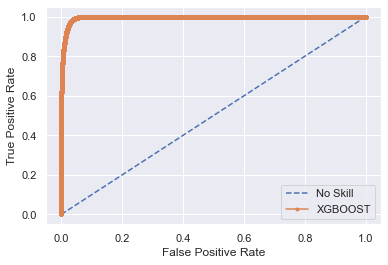

In [69]:
# predict probabilities
xgb_probs = model.predict_proba(X_test)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBOOST')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

####  ROC- AUC Score is also very high at 0.996 , therefore no other model is tried

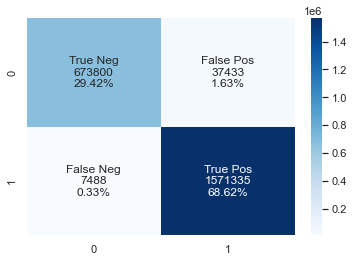

In [70]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:0.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

#### Confusion Matrix also reconfirms our finding for unseen test data

### Plotting Feature Importance

[9.9741435e-01 6.0931430e-04 1.1920626e-03 2.0361117e-04 1.2290094e-04
 4.5776390e-04]


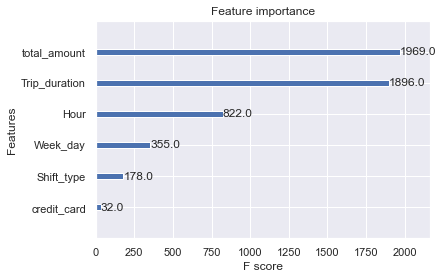

In [71]:
from matplotlib import pyplot
from xgboost import plot_importance
print(model.feature_importances_)
# plot
plot_importance(model)
pyplot.show()

### Predicting tip % using XG Boost Model

In [72]:
import xgboost as xgb
target='tip_percentage'
predictors=['credit_card','Trip_duration','total_amount','Hour','Week_day','Shift_type','trip_distance']
X = yti[predictors]
Y = yti[target]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train, y_train)
# make predictions for test data
y_pred = xg_reg.predict(X_test)
predictions = [round(value) for value in y_pred]


[04:16:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [73]:
from sklearn.metrics import mean_squared_error, r2_score
print('\nMean Square error" ', mean_squared_error(y_test,y_pred))
print('Coefficient of determination: %.2f:',
      r2_score(y_test,y_pred))



Mean Square error"  45.162473909013
Coefficient of determination: %.2f: 0.30389552948998777


#### XG Boost model did not do a very good job in predicting tip %. We will use Random Forest Regressor 

In [75]:
#Very High MeanSquare Error for XGBOOST ,Trying Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
target='tip_percentage'
predictors=['credit_card','Trip_duration','total_amount','Hour','Week_day','Shift_type','trip_distance']
X = yti[predictors]
Y = yti[target]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# make predictions for test data
y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]


In [76]:
from sklearn.metrics import mean_squared_error, r2_score
print('\nMean Square error" ', mean_squared_error(y_test,y_pred))
print('Coefficient of determination: %.2f:',
      r2_score(y_test,y_pred))



Mean Square error"  3.4682598901707147
Coefficient of determination: %.2f: 0.9465425384069452


#### Random forest regressor outperformed XGBoost significantly with very low mean squared error and very high coefficient of determination

***Plotting feature importance***

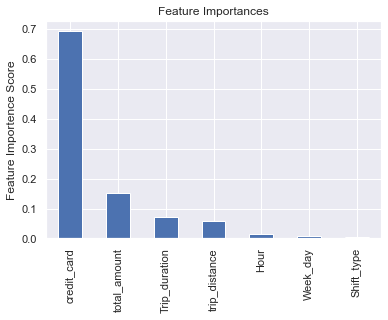

In [77]:
feat_imp = pd.Series(rf.feature_importances_,predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar',title='Feature Importances')
plt.ylabel('Feature Importence Score')
plt.show()


***It seeems credit card payments are significatly associated with tip percentage, most likely due to cash transactions are not recorded***

### Developing a system to first predict whether tips will be paid using XGBOOST classifier and running Random Forest Regressor at top of it to predict tip percentage

In [79]:
#### https://github.com/kthouz/NYC_Green_Taxi (Most of the python codes are taken from here)
#combining the XGBoost For Classification OF WITH_TIP and RandomForest Regressor for Tip Percentage
def predict_tip1(transaction):
    """
    This function predicts the percentage tip expected on 1 transaction 
    transaction: pandas.dataframe, this should have been cleaned first and feature engineered
    """
    # define predictors labels as per optimization results
    cls_predictors = ['credit_card','Trip_duration','total_amount','Hour','Week_day','Shift_type']

    reg_predictors = ['credit_card','Trip_duration','total_amount','Hour','Week_day','Shift_type','trip_distance']
    
    # classify transactions
    clas = model.predict(transaction[cls_predictors])
    
    # predict tips for those transactions classified as 1
    return clas*rf.predict(transaction[reg_predictors])

In [80]:
# Testing the Random Forest regressor to Predict Tip Percentage on the Transactions Classified as With Tip by XGBoost Classifier
test4 = yti.loc[np.random.choice(yti.index,size =2000000,replace=False)]
ypred = predict_tip1(test4)
print ("final mean_squared_error:", metrics.mean_squared_error(ypred,test4.tip_percentage))
print ("final r2_score:", metrics.r2_score(ypred,test4.tip_percentage))

final mean_squared_error: 1.9191815328324515
final r2_score: 0.9695479114640337


***It seems like the model performed very well when the two models are combined to predict tip percentage***

### Residual Plot for tip %

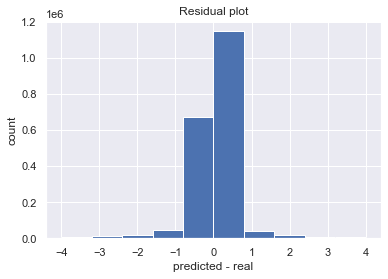

In [85]:
df = test4.copy() # make a copy of data
df['predictions'] = ypred # add predictions column
df['residuals'] = df.tip_percentage - df.predictions # calculate residuals

df.residuals.hist(bins = 10, range=(-4,4)) # plot histogram of residuals
#plt.yscale('log')
plt.xlabel('predicted - real')
plt.ylabel('count')
plt.title('Residual plot')
plt.show()

### The residul plot looks very good and majority of predictions are within +/- 1%

regression plot for prdeiction and actual tip percentage


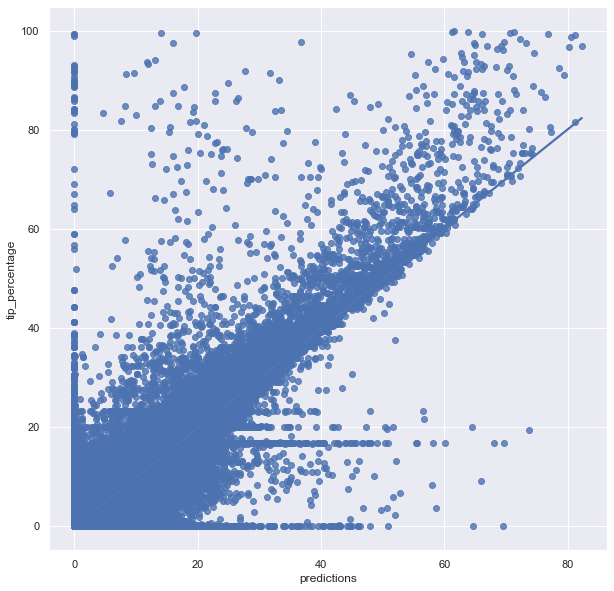

In [87]:
print("regression plot for prdeiction and actual tip percentage")
plt.figure(figsize=(10,10))
sns.regplot(x="predictions", y="tip_percentage",data=df)
plt.show()

### Summary

##### Key Findings

###### Classification of Tips

•	The dataset consists of approximately 72% Credit Card and 28% Cash transactions. However, the transactions resulting in tips are entirely with Credit Card. Although, this phenomenon cannot be explained by data, but intuitively it can be said that the tips are not reported when the transactions are done by cash to avoid paying taxes.

•	At least 25% of the total transactions resulted in zero tips.

•	Trip Duration was the most important feature for the XGBoost Classifier and longer trip duration may be leading to fatigue and customers may not be willing to pay tips.

##### Predicting Tip Percentage

•	Median Tip Percentage for the Yellow Taxi is 14.5% with a mean of 10.7%. 

•	Tip Percentage is lowest during weekends. Median Tip Percentage goes up from approximately 13% on the weekends to above 16% between Tuesday to Thursday and again drops down to 14% on Friday. Higher tip percentage between Tuesday to Thursday may be attributed to more business travel during the period.

•	None of the continuous variables had significant correlation with tip percentage indicating variables like trip distance, fare amount does not contribute much to the tipping behavior of the customers.

•	Interestingly, Tip Percentage changed with the hour of the day. Median tip percentage is highest for the travel between 08:00 PM to 12:00 PM at above 16%. It drops from mid night to 04:00 AM to as low as 8%. It further increases from 04:00 AM to 08:00 AM and goes up to close to 15%. During Office Hours it start dropping again and drops down to 13% at 05:00 PM. Higher tip percentage in the evenings might be due to the fact that people may be spending time at restaurants and bars after office hours and are more generous in paying tips after spending some good time. 

•	Fare amount and Trip Duration has slight negative correlation with tip percentage. It could be attributed to the fatigue of travelling and to save money when the fare amount is already high.

##### Challenges Encountered

The biggest challenge we faced was computational limitations. Yellow Taxi Data consisted of close to 6.9 million rows and 19 columns and it took a long time in processing the codes. 

### References:

•	http://toddwschneider.com/posts/analyzing-1-1-billion-nyc-taxi-and-uber-trips-with-a-vengeance/

•	http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml 

•	http://people.cs.vt.edu/~naren/papers/taxicabs-urbcomp15.pdf

•	https://github.com/kthouz/NYC_Green_Taxi (Most of the python codes are taken from here)

•	https://www.kaggle.com/kartikkannapur/nyc-taxi-trips-exploratory-data-analysis( A few python codes are taken from here)

•	https://www.kaggle.com/c/nyc-taxi-trip-duration

•	https://nycdatascience.com/blog/student-works/predict-new-york-city-taxi-demand/

•	https://github.com/toddwschneider/nyc-taxi-data



